# Analysis of Opinions on Same-Sex Relations

TODO
- Write intro explaining `homosex` variable
- Add two-sentence description to each subheader and brief explanation of results at end of section
- rearrange graphs so Cohort-Age-Period come before demographic stuff
- Ariana does logistic regression
- Emma does graphs

In an effort to understand public opinion on same-sex relations, we used the GSS variable `homosex`. The survey question specifically asks "What about sexual relations between two adults of the same sex--do you think it is always wrong, almost always wrong, wrong only sometimes, or not wrong at all?" Though this question refers only to sexual relations -- not relationships or marriage, which are not a more common question within social science. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf

### Read in the GSS variables.

In [3]:
path = 'gss.hdf5'
gss = pd.read_hdf(path, key='gss')
gss.head()

,ballot,fund,other,denom,relig,cappun,libhomo,colhomo,spkhomo,natfare,...,natrace,nateduc,natdrug,natcity,natheal,natenvir,natspac,polviews,partyid,year
0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1972
1,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1972
2,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1972
3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1972
4,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1972


In [15]:
def make_plots(percentages,
               index,
               xlabel='Year',
               ylabel='Percent',
               titles=['Always Wrong', 'Never Wrong']):
    """
    percentages: dataframe containing percent who approve or 
                    disapprove of same-sex relations based on
                    different demographic information
    index: number of columns in dataframe to pull from
    xlabel: x-axis label
    ylabel: y-axis label
    title: graph title
    
    creates an approve plot and a disapprove plot based on
    demographic information, put labels outside of the graph
    
    """
    
    assert len(titles) == 2
    
    ax = plt.subplot(111)
    for column in percentages.columns[1:index]:
        ax.plot(percentages['year'],
                percentages[column],
                label=" ".join(column.split()[:-1]))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(titles[0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
        
    ax = plt.subplot(111)
    for column in percentages.columns[index:]:
        ax.plot(percentages['year'],
                percentages[column],
                label=" ".join(column.split()[:-1]))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(titles[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Age-Period-Cohort Analysis

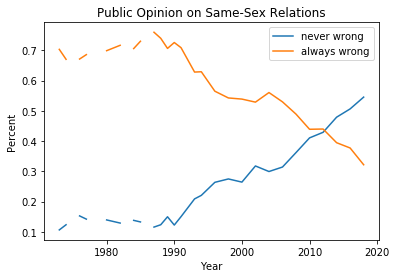

In [16]:
grouped_year = gss.groupby('year')
columns = ['year', 'never wrong', 'always wrong']
percentages = pd.DataFrame([], columns=columns)
for year, group in grouped_year:
    never_wrong = (group['homosex'].dropna() == 4).mean()
    always_wrong = (group['homosex'].dropna() == 1).mean()
    row = pd.DataFrame([[year, never_wrong, always_wrong]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)
plt.plot(percentages['year'], percentages['never wrong'])
plt.plot(percentages['year'], percentages['always wrong'])
plt.title('Public Opinion on Same-Sex Relations')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()

Public opinion on same-sex relations has changed quite rapidly relative to other national opinion (show in the graph above). To analyze how the trend has happened, we performed an age-period-cohort analysis of the GSS `homosex` variable.

### Grouped by year of birth (`cohort`), plotted by year of survey

Grouping by the year a respondent was born, or `cohort`, and plotting the average approval and disapproval rate for each birth year against the year of the survey gives us insight into generational changes. There is a noticable shift in generations over time, which indicates that peoples minds are changing overtime, regardless of when they were born (though younger generations cahnge more rapidly).

In [17]:
grouped_year = gss.groupby('year')

columns = ['year',
           '1930s always',
           '1940s always',
           '1950s always',
           '1960s always',
           '1970s always',
           '1980s always',
           '1990s always',
           '1930s never',
           '1940s never',
           '1950s never',
           '1960s never',
           '1970s never',
           '1980s never',
           '1990s never']

percentages = pd.DataFrame([], columns=columns)


for year, group in grouped_year:
    
    cohort1 = group[(group['cohort'] >= 1930) &(group['cohort'] < 1940)]
    cohort2 = group[(group['cohort'] >= 1940) & (group['cohort'] < 1950)]
    cohort3 = group[(group['cohort'] >= 1950) & (group['cohort'] < 1960)]
    cohort4 = group[(group['cohort'] >= 1960) & (group['cohort'] < 1970)]
    cohort5 = group[(group['cohort'] >= 1970) & (group['cohort'] < 1980)]
    cohort6 = group[(group['cohort'] >= 1980) & (group['cohort'] < 1990)]
    cohort7 = group[(group['cohort'] >= 1990) & (group['cohort'] < 2000)]
    
    a1 = (cohort1['homosex'].dropna() == 1).mean()
    a2 = (cohort2['homosex'].dropna() == 1).mean()
    a3 = (cohort3['homosex'].dropna() == 1).mean()
    a4 = (cohort4['homosex'].dropna() == 1).mean()
    a5 = (cohort5['homosex'].dropna() == 1).mean()
    a6 = (cohort6['homosex'].dropna() == 1).mean()
    a7 = (cohort7['homosex'].dropna() == 1).mean()
    
    n1 = (cohort1['homosex'].dropna() == 4).mean()
    n2 = (cohort2['homosex'].dropna() == 4).mean()
    n3 = (cohort3['homosex'].dropna() == 4).mean()
    n4 = (cohort4['homosex'].dropna() == 4).mean()
    n5 = (cohort5['homosex'].dropna() == 4).mean()
    n6 = (cohort6['homosex'].dropna() == 4).mean()
    n7 = (cohort7['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, a1, a2, a3, a4, a5, a6, a7, n1, n2, n3, n4, n5, n6, n7]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

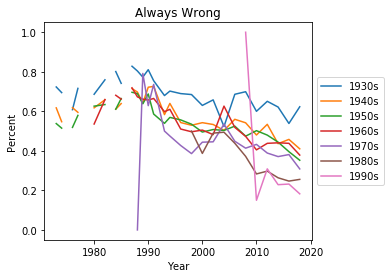

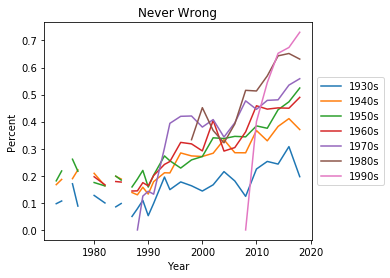

In [18]:
make_plots(percentages, 8, xlabel="Year")

### Grouped by age during survey, plotted by survey year

Looking at age groups and their average opinion on same-sex relations in each year shows how the opinion of different age groups has changed over time. This can show us the effect that age group has on opinion.

In [24]:
grouped_year = gss.groupby('year')

columns = ['year',
           '20s always',
           '30s always',
           '40s always',
           '50s always',
           '60s always',
           '70s always',
           '80s always',
           '20s never',
           '30s never',
           '40s never',
           '50s never',
           '60s never',
           '70s never',
           '80s never']

percentages = pd.DataFrame([], columns=columns)


for year, group in grouped_year:
    
    twenty = group[(group['age'] < 30)]
    thirty = group[(group['age'] >= 30) & (group['age'] < 40)]
    fourty = group[(group['age'] >= 40) & (group['age'] < 50)]
    fifty = group[(group['age'] >= 50) & (group['age'] < 60)]
    sixty = group[(group['age'] >= 60) & (group['age'] < 70)]
    seventy = group[(group['age'] >= 70) & (group['age'] < 80)]
    eighty = group[(group['age'] >= 80) & (group['age'] <= 89)]
    
    a20 = (twenty['homosex'].dropna() == 1).mean()
    a30 = (thirty['homosex'].dropna() == 1).mean()
    a40 = (fourty['homosex'].dropna() == 1).mean()
    a50 = (fifty['homosex'].dropna() == 1).mean()
    a60 = (sixty['homosex'].dropna() == 1).mean()
    a70 = (seventy['homosex'].dropna() == 1).mean()
    a80 = (eighty['homosex'].dropna() == 1).mean()
    
    n20 = (twenty['homosex'].dropna() == 4).mean()
    n30 = (thirty['homosex'].dropna() == 4).mean()
    n40 = (fourty['homosex'].dropna() == 4).mean()
    n50 = (fifty['homosex'].dropna() == 4).mean()
    n60 = (sixty['homosex'].dropna() == 4).mean()
    n70 = (seventy['homosex'].dropna() == 4).mean()
    n80 = (eighty['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year,
                         a20, a30, a40, a50, a60, a70, a80, n20, n30, n40, n50, n60, n70, n80]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

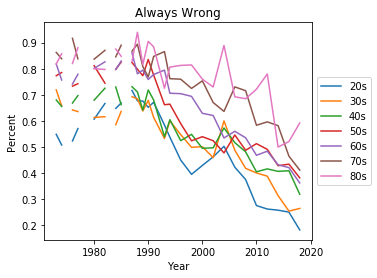

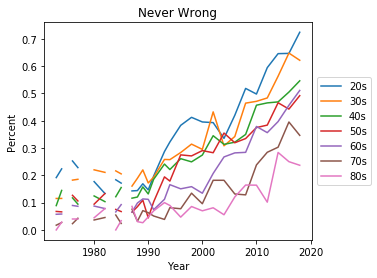

In [25]:
make_plots(percentages, 8)

### Grouped by year of birth (`cohort`), plotted by age during survey

Looking at each cohort group's opinion by the age that they were when they took the survey can show us how much your birth year matters across different ages. Or, how peoples minds' change over their time depending on which devade they were born in.

In [32]:
grouped_age = gss.groupby('age')

columns = ['year',
           '1930s always',
           '1940s always',
           '1950s always',
           '1960s always',
           '1970s always',
           '1980s always',
           '1990s always',
           '1930s never',
           '1940s never',
           '1950s never',
           '1960s never',
           '1970s never',
           '1980s never',
           '1990s never']

percentages = pd.DataFrame([], columns=columns)


for age, group in grouped_age:
    
    cohort1 = group[(group['cohort'] >= 1930) &(group['cohort'] < 1940)]
    cohort2 = group[(group['cohort'] >= 1940) & (group['cohort'] < 1950)]
    cohort3 = group[(group['cohort'] >= 1950) & (group['cohort'] < 1960)]
    cohort4 = group[(group['cohort'] >= 1960) & (group['cohort'] < 1970)]
    cohort5 = group[(group['cohort'] >= 1970) & (group['cohort'] < 1980)]
    cohort6 = group[(group['cohort'] >= 1980) & (group['cohort'] < 1990)]
    cohort7 = group[(group['cohort'] >= 1990) & (group['cohort'] < 2000)]
    
    a1 = (cohort1['homosex'].dropna() == 1).mean()
    a2 = (cohort2['homosex'].dropna() == 1).mean()
    a3 = (cohort3['homosex'].dropna() == 1).mean()
    a4 = (cohort4['homosex'].dropna() == 1).mean()
    a5 = (cohort5['homosex'].dropna() == 1).mean()
    a6 = (cohort6['homosex'].dropna() == 1).mean()
    a7 = (cohort7['homosex'].dropna() == 1).mean()
    
    n1 = (cohort1['homosex'].dropna() == 4).mean()
    n2 = (cohort2['homosex'].dropna() == 4).mean()
    n3 = (cohort3['homosex'].dropna() == 4).mean()
    n4 = (cohort4['homosex'].dropna() == 4).mean()
    n5 = (cohort5['homosex'].dropna() == 4).mean()
    n6 = (cohort6['homosex'].dropna() == 4).mean()
    n7 = (cohort7['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[age, a1, a2, a3, a4, a5, a6, a7, n1, n2, n3, n4, n5, n6, n7]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

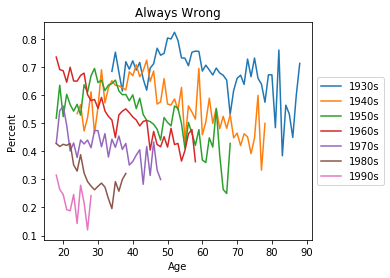

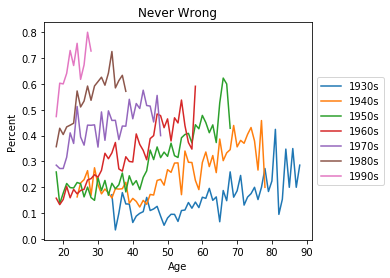

In [33]:
make_plots(percentages, 8, xlabel="Age")

### Grouped by survey year, plotted by age during survey

Looking at the opinion of grouped survey years (approximately every 7 years) compared to their age when they took the survey allows us to see how much, within each survey grouping, opinion varies by age.

In [34]:
grouped_age = gss.groupby('age')

columns = ['year',
           '1972-1979 always',
           '1980-1987 always',
           '1988-1995 always',
           '1996-2003 always',
           '2004-2011 always',
           '2012-2018 always',
           '1972-1979 never',
           '1980-1987 never',
           '1988-1995 never',
           '1996-2003 never',
           '2004-2011 never',
           '2012-2018 never']

percentages = pd.DataFrame([], columns=columns)


for age, group in grouped_age:
    
    year1 = group[(group['year'] < 1980)]
    year3 = group[(group['year'] >= 1980) & (group['year'] < 1988)]
    year5 = group[(group['year'] >= 1988) & (group['year'] < 1996)]
    year7 = group[(group['year'] >= 1996) & (group['year'] < 2004)]
    year9 = group[(group['year'] >= 2004) & (group['year'] < 2012)]
    year11 = group[(group['year'] >= 2012) & (group['year'] <= 2018)]
    
    a1 = (year1['homosex'].dropna() == 1).mean()
    a3 = (year3['homosex'].dropna() == 1).mean()
    a5 = (year5['homosex'].dropna() == 1).mean()
    a7 = (year7['homosex'].dropna() == 1).mean()
    a9 = (year9['homosex'].dropna() == 1).mean()
    a11 = (year11['homosex'].dropna() == 1).mean()
    
    n1 = (year1['homosex'].dropna() == 4).mean()
    n3 = (year3['homosex'].dropna() == 4).mean()
    n5 = (year5['homosex'].dropna() == 4).mean()
    n7 = (year7['homosex'].dropna() == 4).mean()
    n9 = (year9['homosex'].dropna() == 4).mean()
    n11 = (year11['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[age,
                         a1, a3, a5, a7,a9, a11, n1, n3, n5, n7, n9, n11]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

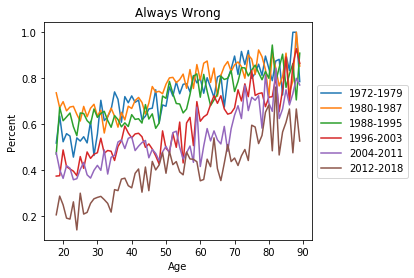

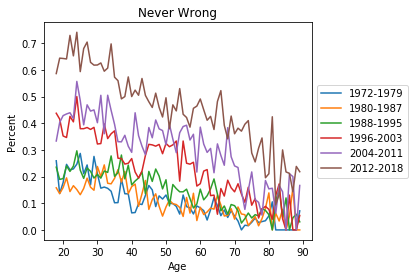

In [35]:
make_plots(percentages, 7, xlabel="Age")

### Grouped by survey year, plotted by year of birth (`cohort`)

Grouping by the year the survey was taken and plotting the average approval and disapproval rate for each survey year against the year the respondent was born gives us how much the year that a respondent was born and when effects their opinion compared to when they took the survey. There is a definite different in opinion between each survey year grouping, with a strong downward trend by cohort.

In [42]:
grouped_cohort = gss.groupby('cohort')

columns = ['year',
           '1972-1979 always',
           '1980-1987 always',
           '1988-1995 always',
           '1996-2003 always',
           '2004-2011 always',
           '2012-2018 always',
           '1972-1979 never',
           '1980-1987 never',
           '1988-1995 never',
           '1996-2003 never',
           '2004-2011 never',
           '2012-2018 never']

percentages = pd.DataFrame([], columns=columns)


for cohort, group in grouped_cohort:
    
    year1 = group[(group['year'] < 1980)]
    year3 = group[(group['year'] >= 1980) & (group['year'] < 1988)]
    year5 = group[(group['year'] >= 1988) & (group['year'] < 1996)]
    year7 = group[(group['year'] >= 1996) & (group['year'] < 2004)]
    year9 = group[(group['year'] >= 2004) & (group['year'] < 2012)]
    year11 = group[(group['year'] >= 2012) & (group['year'] <= 2018)]
    
    a1 = (year1['homosex'].dropna() == 1).mean()
    a3 = (year3['homosex'].dropna() == 1).mean()
    a5 = (year5['homosex'].dropna() == 1).mean()
    a7 = (year7['homosex'].dropna() == 1).mean()
    a9 = (year9['homosex'].dropna() == 1).mean()
    a11 = (year11['homosex'].dropna() == 1).mean()
    
    n1 = (year1['homosex'].dropna() == 4).mean()
    n3 = (year3['homosex'].dropna() == 4).mean()
    n5 = (year5['homosex'].dropna() == 4).mean()
    n7 = (year7['homosex'].dropna() == 4).mean()
    n9 = (year9['homosex'].dropna() == 4).mean()
    n11 = (year11['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[cohort,
                         a1, a3, a5, a7,a9, a11, n1, n3, n5, n7, n9, n11]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

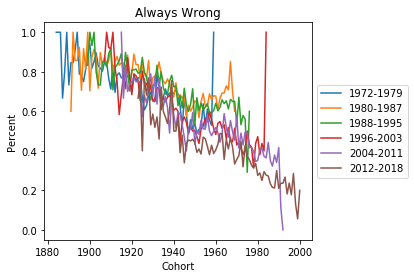

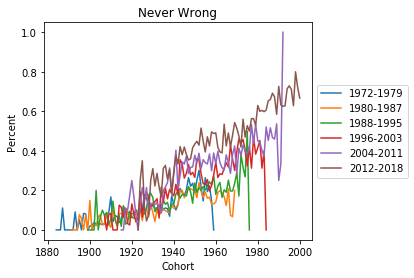

In [43]:
make_plots(percentages, 7, xlabel="Cohort")

### Grouped by age during survey, plotted by year of birth (`cohort`)

Grouping by age and plotting against cohort allows us to see look at respondents who took the survey around the same age, but who were born during different years. So mapping how the opinion of people in their 20s changed if they were born in 1920 or if they were born in 1980. This graph shows a fairly quick change across all age groups. This indicates that the year that you were born matters a lot more than how old you are when you are surveyed. There is still a slight difference between different age groups, but not as significant as how much each age group changes by year surveyed. 

In [30]:
grouped_cohort = gss.groupby('cohort')

columns = ['year',
           '20s always',
           '30s always',
           '40s always',
           '50s always',
           '60s always',
           '70s always',
           '80s always',
           '20s never',
           '30s never',
           '40s never',
           '50s never',
           '60s never',
           '70s never',
           '80s never']

percentages = pd.DataFrame([], columns=columns)


for cohort, group in grouped_cohort:
    
    twenty = group[(group['age'] < 30)]
    thirty = group[(group['age'] >= 30) & (group['age'] < 40)]
    fourty = group[(group['age'] >= 40) & (group['age'] < 50)]
    fifty = group[(group['age'] >= 50) & (group['age'] < 60)]
    sixty = group[(group['age'] >= 60) & (group['age'] < 70)]
    seventy = group[(group['age'] >= 70) & (group['age'] < 80)]
    eighty = group[(group['age'] >= 80) & (group['age'] <= 89)]
    
    a20 = (twenty['homosex'].dropna() == 1).mean()
    a30 = (thirty['homosex'].dropna() == 1).mean()
    a40 = (fourty['homosex'].dropna() == 1).mean()
    a50 = (fifty['homosex'].dropna() == 1).mean()
    a60 = (sixty['homosex'].dropna() == 1).mean()
    a70 = (seventy['homosex'].dropna() == 1).mean()
    a80 = (eighty['homosex'].dropna() == 1).mean()
    
    n20 = (twenty['homosex'].dropna() == 4).mean()
    n30 = (thirty['homosex'].dropna() == 4).mean()
    n40 = (fourty['homosex'].dropna() == 4).mean()
    n50 = (fifty['homosex'].dropna() == 4).mean()
    n60 = (sixty['homosex'].dropna() == 4).mean()
    n70 = (seventy['homosex'].dropna() == 4).mean()
    n80 = (eighty['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[cohort,
                         a20, a30, a40, a50, a60, a70, a80, n20, n30, n40, n50, n60, n70, n80]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

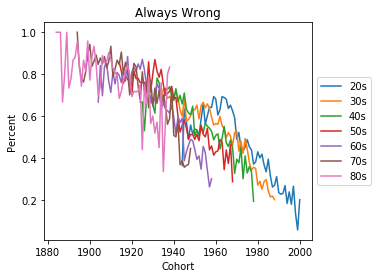

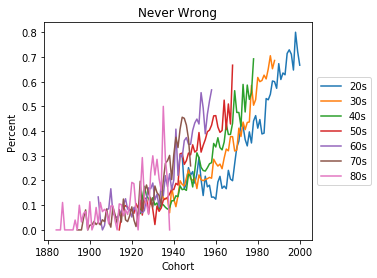

In [31]:
make_plots(percentages, 8, xlabel="Cohort")

## Demographic Changes

### Sex

Using the `sex` variable which refers to the respondents sex we compared survey year and cohort opinion between male and female respondents.

In [44]:
grouped_year = gss.groupby('year')

columns = ['year', 'male always', 'female always', 'male never', 'female never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_sex = group.groupby('sex')
    male_homosex = grouped_sex.get_group(1)['homosex'].dropna()
    female_homosex = grouped_sex.get_group(2)['homosex'].dropna()
    
    percent_male_always = (male_homosex == 1).mean() * 100
    percent_male_never = (male_homosex == 4).mean() * 100
    percent_female_always = (female_homosex == 1).mean() * 100
    percent_female_never = (female_homosex == 4).mean() * 100
    
    row = pd.DataFrame([[year, percent_male_always, percent_female_always, percent_male_never, percent_female_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

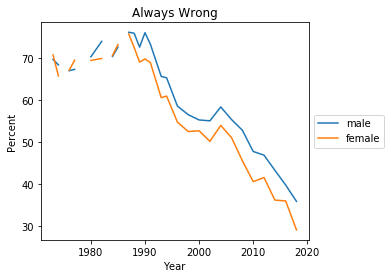

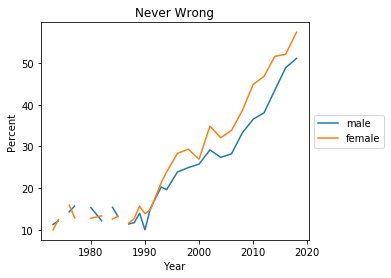

In [45]:
make_plots(percentages, 3)

In [68]:
grouped_cohort = gss.groupby('cohort')

columns = ['year', 'male always', 'female always', 'male never', 'female never']

percentages = pd.DataFrame([], columns=columns)

for cohort, group in grouped_cohort:
    grouped_sex = group.groupby('sex')
    male_homosex = grouped_sex.get_group(1)['homosex'].dropna()
    female_homosex = grouped_sex.get_group(2)['homosex'].dropna()
    
    percent_male_always = (male_homosex == 1).mean()
    percent_male_never = (male_homosex == 4).mean()
    percent_female_always = (female_homosex == 1).mean()
    percent_female_never = (female_homosex == 4).mean()
    
    row = pd.DataFrame([[cohort, percent_male_always, percent_female_always, percent_male_never, percent_female_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

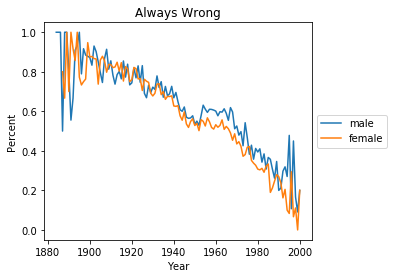

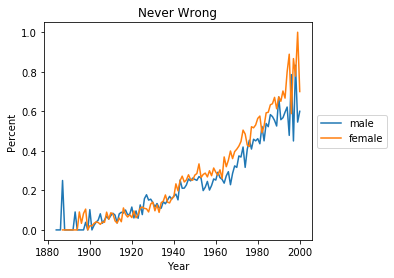

In [69]:
make_plots(percentages, 3)

In our cohort analysis, we can see that men and women have a very similar opinion on same-sex relations, until around 1950 when there is a split in the date. Given that the average survey respondent is 45, it makes sense that the period analysis shows this split in 1995. The period analysis also shows an interesting jump in disapproving opinions around 2004, which might be due to the more conservative congress or in reaction to the small jump in approving opinions that preceded it.

### Income

Using the `real` variable which refers to the respondents income in 1986 dollors we compared survey year opinion between different income groupings, based on the 1987 tax brackets for single people (post-1986 Tax Reform).

In [70]:
grouped_year = gss.groupby('year')

columns = ['year',
           '<1.8 always',
           '1.8-16 always',
           '16-27 always',
           '27-54 always',
           '>54 always',
           '<1.8 never',
           '1.8-16 never',
           '16-27 never',
           '27-54 never',
           '>54 never',]

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    inc1 = group[(group['realrinc'] < 1800)]
    percent_inc1_always = (inc1['homosex'].dropna() == 1).mean()
    percent_inc1_never = (inc1['homosex'].dropna() == 4).mean()
    
    inc2 = group[(group['realrinc'] >= 1800) & (group['realrinc'] < 16000)]
    percent_inc2_always = (inc2['homosex'].dropna() == 1).mean()
    percent_inc2_never = (inc2['homosex'].dropna() == 4).mean()
    
    inc3 = group[(group['realrinc'] >= 16000) & (group['realrinc'] < 27000)]
    percent_inc3_always = (inc3['homosex'].dropna() == 1).mean()
    percent_inc3_never = (inc3['homosex'].dropna() == 4).mean()
    
    inc4 = group[(group['realrinc'] >= 27000) & (group['realrinc'] < 54000)]
    percent_inc4_always = (inc4['homosex'].dropna() == 1).mean()
    percent_inc4_never = (inc4['homosex'].dropna() == 4).mean()
    
#     inc5 = group[(group['realrinc'] >= 120000) & (group['realrinc'] < 270000)]
#     percent_inc5_always = (inc5['homosex'].dropna() == 1).mean()
#     percent_inc5_never = (inc5['homosex'].dropna() == 4).mean()
    
    inc6 = group[(group['realrinc'] >= 54000)]
    percent_inc6_always = (inc6['homosex'].dropna() == 1).mean()
    percent_inc6_never = (inc6['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year,
                         percent_inc1_always,
                         percent_inc2_always,
                         percent_inc3_always,
                         percent_inc4_always,
#                          percent_inc5_always,
                         percent_inc6_always,
                         percent_inc1_never,
                         percent_inc2_never,
                         percent_inc3_never,
                         percent_inc4_never,
#                          percent_inc5_never,
                         percent_inc6_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

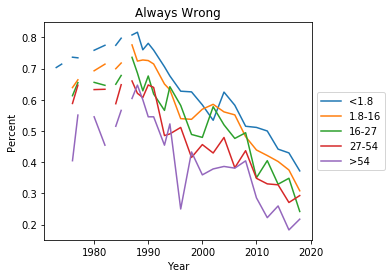

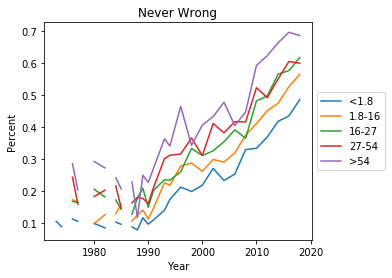

In [71]:
make_plots(percentages, 6)

This period analysis of income indicates that those who earn more are more likely to be more approving of same-sex relations, regardless of time and as time goes on, everyone is more approving.

### Political Affiliation

In [118]:
grouped_year = gss.groupby('year')

columns = ['year',
          'ext lib always',
          'lib always',
          'sl lib always',
          'mod always',
          'sl con always',
          'con always',
          'ext con always',
          'ext lib never',
          'lib never',
          'sl lib never',
          'mod never',
          'sl con never',
          'con never',
          'ext con never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_pol = group.groupby('polviews')
    keys = list(grouped_pol.groups.keys())
    if len(keys) == 8:
        
        ela = (grouped_pol.get_group(1)['homosex'].dropna() == 1).mean()
        la = (grouped_pol.get_group(2)['homosex'].dropna() == 1).mean()
        sla = (grouped_pol.get_group(3)['homosex'].dropna() == 1).mean()
        ma = (grouped_pol.get_group(4)['homosex'].dropna() == 1).mean()
        sca = (grouped_pol.get_group(5)['homosex'].dropna() == 1).mean()
        ca = (grouped_pol.get_group(6)['homosex'].dropna() == 1).mean()
        eca = (grouped_pol.get_group(7)['homosex'].dropna() == 1).mean()

        eln = (grouped_pol.get_group(1)['homosex'].dropna() == 4).mean()
        ln = (grouped_pol.get_group(2)['homosex'].dropna() == 4).mean()
        sln = (grouped_pol.get_group(3)['homosex'].dropna() == 4).mean()
        mn = (grouped_pol.get_group(4)['homosex'].dropna() == 4).mean()
        scn = (grouped_pol.get_group(5)['homosex'].dropna() == 4).mean()
        cn = (grouped_pol.get_group(6)['homosex'].dropna() == 4).mean()
        ecn = (grouped_pol.get_group(7)['homosex'].dropna() == 4).mean()

        row = pd.DataFrame([[year, ela, la, sla, ma, sca, ca, eca, eln, ln, sln, mn, scn, cn, ecn]], columns=columns)
        percentages = percentages.append(row, ignore_index=True)

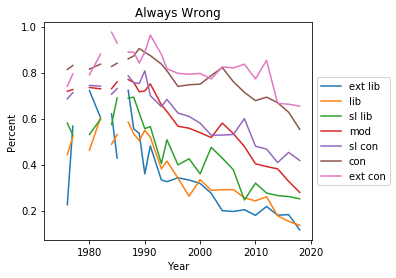

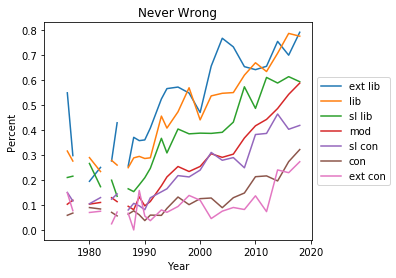

In [119]:
make_plots(percentages, 8)

This analysis shows, as expected, more liberal people are more likely to approve of same-sex relations that more conservative people. Interestingly, compared to other demographic variables, the rate of change between different groups is less extreme over time.

### Religion

To understand the impact of religious affliation, we looked into the `relig` variable which is the respondents answer to the questions "What is your religious preference? Is it Protestant, Catholic, Jewish, some other religion, or no religion?"

In [88]:
grouped_year = gss.groupby('year')
rel = gss.groupby('relig')

# Only the first 5 categories have consistent numbers of respondants.
columns = ['year',
          'protestant always',
          'catholic always',
          'jewish always',
          'none always',
          'other always',
          'protestant never',
          'catholic never',
          'jewish never',
          'none never',
          'other never'
          ]

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_relig = group.groupby('relig')
    keys = list(grouped_relig.groups.keys())
    
    pa = (grouped_relig.get_group(1)['homosex'].dropna() == 1).mean()
    ca = (grouped_relig.get_group(2)['homosex'].dropna() == 1).mean()
    ja = (grouped_relig.get_group(3)['homosex'].dropna() == 1).mean()
    na = (grouped_relig.get_group(4)['homosex'].dropna() == 1).mean()
    oa = (grouped_relig.get_group(5)['homosex'].dropna() == 1).mean()
    
    pn = (grouped_relig.get_group(1)['homosex'].dropna() == 4).mean()
    cn = (grouped_relig.get_group(2)['homosex'].dropna() == 4).mean()
    jn = (grouped_relig.get_group(3)['homosex'].dropna() == 4).mean()
    nn = (grouped_relig.get_group(4)['homosex'].dropna() == 4).mean()
    on = (grouped_relig.get_group(5)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, pa, ca, ja, na, oa, pn, cn, jn, nn, on]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

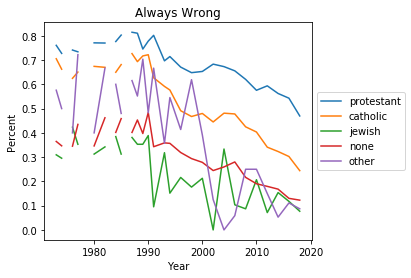

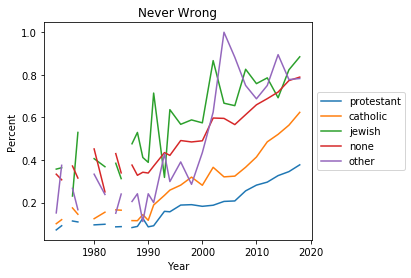

In [89]:
make_plots(percentages, 6)

This analysis shows that each religion is fairly distinct in how they feel about same-sex relations which makes sense given most religions strong view on same-sex relations. There are very few `other` and `jewish` respondents, so those averages are less smooth.

### Fundamentalism

The `fund` variable asks the "Fundamentalism/Liberalism of Respondent's Religion" and splits between fundamentalist, moderate, and liberal.

In [90]:
grouped_year = gss.groupby('year')

columns = ['year',
          'fundamentalist always',
          'moderate always',
          'liberal always',
          'fundamentalist never',
          'moderate never',
          'liberal never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_fund = group.groupby('fund')
    
    fa = (grouped_fund.get_group(1)['homosex'].dropna() == 1).mean()
    ma = (grouped_fund.get_group(2)['homosex'].dropna() == 1).mean()
    la = (grouped_fund.get_group(3)['homosex'].dropna() == 1).mean()
    
    fn = (grouped_fund.get_group(1)['homosex'].dropna() == 4).mean()
    mn = (grouped_fund.get_group(2)['homosex'].dropna() == 4).mean()
    ln = (grouped_fund.get_group(3)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, fa, ma, la, fn, mn, ln]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

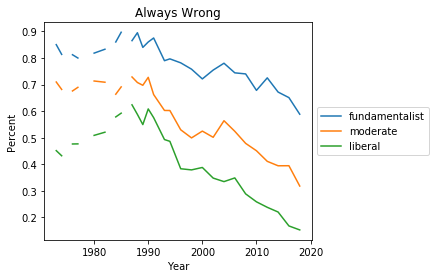

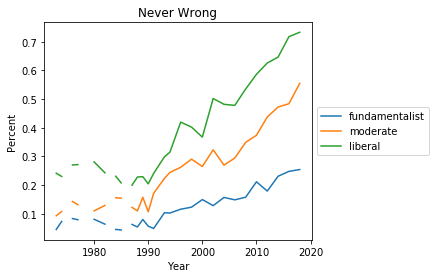

In [91]:
make_plots(percentages, 4)

As expected, respondents who are more fundamental are less likely to approve of same-sex relations, though all people are still trending toward more approval.

### Marital Status

Respondents marital status, or `marital` asks about the current marital status of respondents.

In [92]:
grouped_year = gss.groupby('year')

columns = ['year', 
           'married always', 
           'widowed always', 
           'divorced always', 
           'separated always', 
           'never married always',
           'married never', 
           'widowed never', 
           'divorced never', 
           'separated never', 
           'never married never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_mar = group.groupby('marital')
    
    married_homosex = grouped_mar.get_group(1)['homosex'].dropna()
    widowed_homosex = grouped_mar.get_group(2)['homosex'].dropna()
    divorced_homosex = grouped_mar.get_group(3)['homosex'].dropna()
    separated_homosex = grouped_mar.get_group(4)['homosex'].dropna()
    nev_married_homosex = grouped_mar.get_group(5)['homosex'].dropna()

    ma = (married_homosex == 1).mean()
    wa = (widowed_homosex == 1).mean()
    da = (divorced_homosex == 1).mean()
    sa = (separated_homosex == 1).mean()
    na = (nev_married_homosex == 1).mean()
    
    mn = (married_homosex == 4).mean()
    wn = (widowed_homosex == 4).mean()
    dn = (divorced_homosex == 4).mean()
    sn = (separated_homosex == 4).mean()
    nn = (nev_married_homosex == 4).mean()
    
    row = pd.DataFrame([[year, ma, wa, da, sa, na, mn, wn, dn, sn, nn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

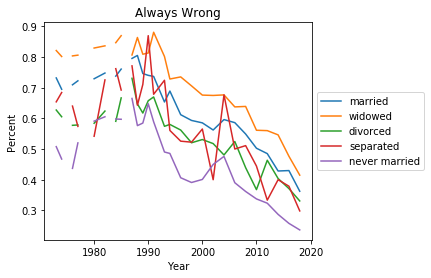

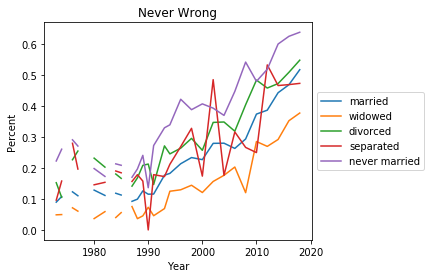

In [93]:
make_plots(percentages, 6)

There are fairly distinct opinions on same-sex relations based on marital status, with those who have never been married being most approving and those who are widowed least approving. This is likely due to how people who have not been married are usually younger and people who have been widowed are usually older.

### 16 Year Old Residence

The variable `res16` is the type of area where the respondents lived when they were 16 years old, which reflects to the best of our knowledge, the area where they grew up.

In [122]:
grouped_year = gss.groupby('year')

columns = ['year',
           'country, nonfarm always',
           'farm always',
           'town <50000 always',
           '50000-250000 always',
           'big-city suburb always',
           'city >250000 always',
           'country, nonfarm never',
           'farm never',
           'town <50000 never',
           '50000-250000 never',
           'big-city suburb never',
           'city >250000 never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    
    grouped_res16 = group.groupby('res16')
    
    country = grouped_res16.get_group(1)['homosex'].dropna()
    farm = grouped_res16.get_group(2)['homosex'].dropna()
    town = grouped_res16.get_group(3)['homosex'].dropna()
    mid = grouped_res16.get_group(4)['homosex'].dropna()
    suburb = grouped_res16.get_group(5)['homosex'].dropna()
    city = grouped_res16.get_group(6)['homosex'].dropna()
           
    cna = (country.dropna() == 1).mean()
    fa = (farm.dropna() == 1).mean()
    ta = (town.dropna() == 1).mean()
    ma = (mid.dropna() == 1).mean()
    sa = (suburb.dropna() == 1).mean()
    ca = (city.dropna() == 1).mean()
    
    cnn = (country.dropna() == 4).mean()
    fn = (farm.dropna() == 4).mean()
    tn = (town.dropna() == 4).mean()
    mn = (mid.dropna() == 4).mean()
    sn = (suburb.dropna() == 4).mean()
    cn = (city.dropna() == 4).mean()
           
    row = pd.DataFrame([[year, cna, fa, ta, ma, sa, ca, cnn, fn, tn, mn, sn, cn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

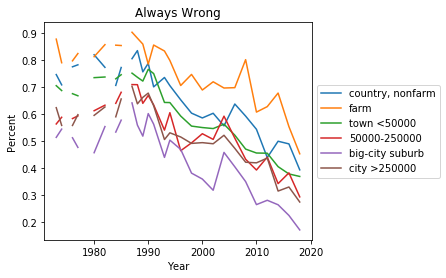

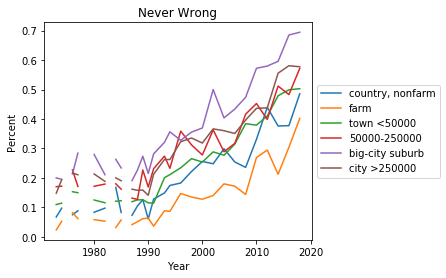

In [123]:
make_plots(percentages, 7)

These graphs depict that the more urban and less rural of a place that someone grows up, the more approving they are of same-sex relations. This could very well be tied to how traditionally "liberal" cities are and tracitionally "conservative" rural areas are.

### Region of Residence at 16

The variable `reg16` is the location where respondents lived when they were 16 years old, which reflects to the best of our knowledge, the area where they grew up.

In [124]:
grouped_year = gss.groupby('year')

columns = ['year',
           'foreign always',
           'new england always',
           'mid atlantic always',
           'EN central always',
           'WN central always',
           'S atlantic always',
           'ES central always',
           'WS central always',
           'mountain always',
           'pacific always',
           'foreign never',
           'new england never',
           'mid atlantic never',
           'EN central never',
           'WN central never',
           'S atlantic never',
           'ES central never',
           'WS central never',
           'mountain never',
           'pacific never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    
    grouped_reg16 = group.groupby('reg16')
    
    foreign = grouped_reg16.get_group(0)['homosex'].dropna()
    ne = grouped_reg16.get_group(1)['homosex'].dropna()
    ma = grouped_reg16.get_group(2)['homosex']
    enc = grouped_reg16.get_group(3)['homosex'].dropna()
    wnc = grouped_reg16.get_group(4)['homosex'].dropna()
    sa = grouped_reg16.get_group(5)['homosex'].dropna()
    esc = grouped_reg16.get_group(6)['homosex'].dropna()
    wsc = grouped_reg16.get_group(7)['homosex'].dropna()
    mount = grouped_reg16.get_group(8)['homosex'].dropna()
    pac = grouped_reg16.get_group(9)['homosex'].dropna()
           
    fa = (foreign.dropna() == 1).mean()
    nea = (ne.dropna() == 1).mean()
    maa = (ma.dropna() == 1).mean()
    enca = (enc.dropna() == 1).mean()
    
    wnca = (wnc.dropna() == 1).mean()
    saa = (sa.dropna() == 1).mean()
    esca = (esc.dropna() == 1).mean()
    wsca = (wsc.dropna() == 1).mean()
    mal = (mount.dropna() == 1).mean()
    pa = (pac.dropna() == 1).mean()
    
    fn = (foreign.dropna() == 4).mean()
    nen = (ne.dropna() == 4).mean()
    man = (ma.dropna() == 4).mean()
    encn = (enc.dropna() == 4).mean()
    wncn = (wnc.dropna() == 4).mean()
    san = (sa.dropna() == 4).mean()
    escn = (esc.dropna() == 4).mean()
    wscn = (wsc.dropna() == 4).mean()
    mn = (mount.dropna() == 4).mean()
    pn = (pac.dropna() == 4).mean()
           
    row = pd.DataFrame([[year, fa, nea, maa, enca, wnca, saa, esca, wsca, mal, pa, fn, nen, man, encn, wncn, san, escn, wscn, mn, pn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

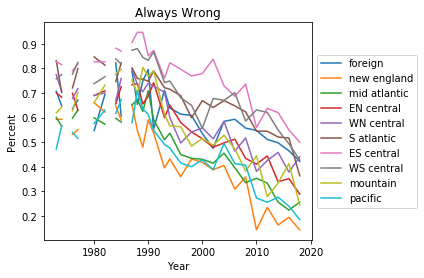

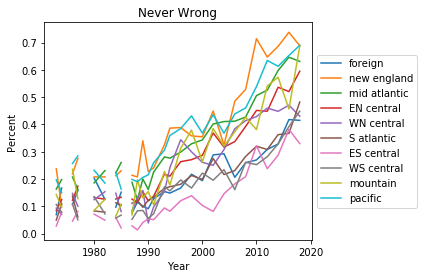

In [125]:
make_plots(percentages, 11)

This period analysis shows that those from New England, the Pacific, and the Mountain zones are most likely to approve and those from SE Central are least likely to approve, with about a 40 point difference. This makes sense given the volume of cities in the the most approving areas and the amount of religion in the least approving.

### Region of Residence at the time of Survey

The variable `region` is the location where respondents is currently living.

In [128]:
grouped_year = gss.groupby('year')

columns = ['year',
           'new england always',
           'mid atlantic always',
           'EN central always',
           'WN central always',
           'S atlantic always',
           'ES central always',
           'WS central always',
           'mountain always',
           'pacific always',
           'new england never',
           'mid atlantic never',
           'EN central never',
           'WN central never',
           'S atlantic never',
           'ES central never',
           'WS central never',
           'mountain never',
           'pacific never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    
    grouped_region = group.groupby('region')
    
    ne = grouped_region.get_group(1)['homosex'].dropna()
    ma = grouped_region.get_group(2)['homosex']
    enc = grouped_region.get_group(3)['homosex'].dropna()
    wnc = grouped_region.get_group(4)['homosex'].dropna()
    sa = grouped_region.get_group(5)['homosex'].dropna()
    esc = grouped_region.get_group(6)['homosex'].dropna()
    wsc = grouped_region.get_group(7)['homosex'].dropna()
    mount = grouped_region.get_group(8)['homosex'].dropna()
    pac = grouped_region.get_group(9)['homosex'].dropna()
           
    nea = (ne.dropna() == 1).mean()
    maa = (ma.dropna() == 1).mean()
    enca = (enc.dropna() == 1).mean()
    wnca = (wnc.dropna() == 1).mean()
    saa = (sa.dropna() == 1).mean()
    esca = (esc.dropna() == 1).mean()
    wsca = (wsc.dropna() == 1).mean()
    mal = (mount.dropna() == 1).mean()
    pa = (pac.dropna() == 1).mean()
    
    nen = (ne.dropna() == 4).mean()
    man = (ma.dropna() == 4).mean()
    encn = (enc.dropna() == 4).mean()
    wncn = (wnc.dropna() == 4).mean()
    san = (sa.dropna() == 4).mean()
    escn = (esc.dropna() == 4).mean()
    wscn = (wsc.dropna() == 4).mean()
    mn = (mount.dropna() == 4).mean()
    pn = (pac.dropna() == 4).mean()
           
    row = pd.DataFrame([[year, nea, maa, enca, wnca, saa, esca, wsca, mal, pa, nen, man, encn, wncn, san, escn, wscn, mn, pn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

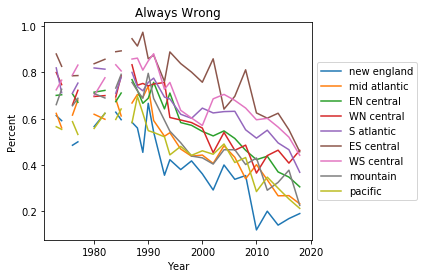

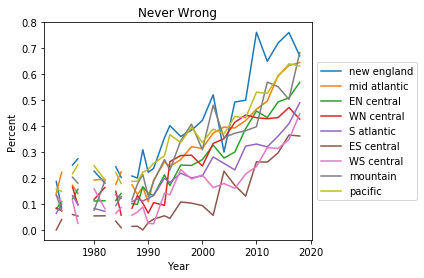

In [129]:
make_plots(percentages, 10)

This period analysis shows results very similar to the `reg16` analysis, which reflects the likelihood of people to leave the zone in which they grew up.

## Logistic Regression

In [28]:
log_model = gss

# Change 'Never Wrong' code to 0 for logistic regression.
log_model['homosex'].replace(4, 0, inplace=True)
log_model['homosex'].value_counts()

1.0    23469
0.0     9880
3.0     2554
2.0     1756
8.0     1743
5.0       82
Name: homosex, dtype: int64

In [29]:
log_model['homosex'].replace([2, 3, 5, 8], np.nan, inplace=True)
log_model['homosex'].value_counts()

1.0    23469
0.0     9880
Name: homosex, dtype: int64

In [30]:
# results_sex = smf.logit('homosex ~ year + age +C(sex) + C(fund) + C(region)', data=log_model).fit()
results_sex = smf.logit('homosex ~ year + cohort + C(sex) + C(reg16) + C(relig) + C(attend)', data=log_model).fit()

Optimization terminated successfully.
         Current function value: 0.451816
         Iterations 7


In [31]:
results_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                homosex   No. Observations:                32941
Model:                          Logit   Df Residuals:                    32907
Method:                           MLE   Df Model:                           33
Date:                Sat, 06 Apr 2019   Pseudo R-squ.:                  0.2571
Time:                        16:36:34   Log-Likelihood:                -14883.
converged:                       True   LL-Null:                       -20033.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          121.7451      2.362     51.533      0.000     117.115     126.375
C(sex)[T.2]         -0.4985      0.030    -16.825      0.000      -0.557      -0.440
C(reg16)[T.1]       -1.2801      0.086    -14.921      0.000      -1.448      -1.112
C(reg16)[T.2]       -0.9788      0.069    -14.190      0.000      -1.114      -0.844
C(reg16)[T.3]       -0.6621      0.068     -9.777      0.000      -0.795      -0.529
C(reg16)[T.4]       -0.6739      0.079     -8.556      0.000      -0.828      -0.520
C(reg16)[T.5]       -0.2634      0.072     -3.680      0.000      -0.404      -0.123
C(reg16)[T.6]        0.2289      0.089      2.561      0.010       0.054       0.404
C(reg16)[T.7]       -0.0818      0.080     -1.028      0.304      -0.238       0.074
C(reg16)[T.8]       -0.5429      0.088     -6.191      0.000      -0.715      -0.371
C(reg16)[T.9]       -0.9372      0.073    -12.814      0.000      -1.081      -0.794
C(relig)[T.2.0]     -0.5239      0.036    -14.583      0.000      -0.594      -0.453
C(relig)[T.3.0]     -2.0928      0.104    -20.153      0.000      -2.296      -1.889
C(relig)[T.4.0]     -1.2222      0.048    -25.247      0.000      -1.317      -1.127
C(relig)[T.5.0]     -1.1284      0.102    -11.098      0.000      -1.328      -0.929
C(relig)[T.6.0]     -2.1240      0.292     -7.275      0.000      -2.696      -1.552
C(relig)[T.7.0]     -1.1609      0.318     -3.655      0.000      -1.783      -0.538
C(relig)[T.8.0]     -0.7906      0.530     -1.491      0.136      -1.830       0.249
C(relig)[T.9.0]      0.5370      0.300      1.791      0.073      -0.051       1.125
C(relig)[T.10.0]    -0.7048      0.300     -2.352      0.019      -1.292      -0.117
C(relig)[T.11.0]     0.0862      0.119      0.726      0.468      -0.147       0.319
C(relig)[T.12.0]    -0.6884      0.627     -1.098      0.272      -1.917       0.540
C(relig)[T.13.0]    -0.1643      0.294     -0.558      0.577      -0.741       0.413
C(relig)[T.98.0]    -0.3910      0.512     -0.764      0.445      -1.394       0.612
C(attend)[T.1.0]    -0.0163      0.058     -0.280      0.780      -0.130       0.098
C(attend)[T.2.0]     0.0504      0.049      1.022      0.307      -0.046       0.147
C(attend)[T.3.0]     0.2905      0.053      5.531      0.000       0.188       0.393
C(attend)[T.4.0]     0.3987      0.063      6.334      0.000       0.275       0.522
C(attend)[T.5.0]     0.5901      0.060      9.798      0.000       0.472       0.708
C(attend)[T.6.0]     1.0692      0.078     13.622      0.000       0.915       1.223
C(attend)[T.7.0]     1.2661      0.052     24.211      0.000       1.164       1.369
C(attend)[T.8.0]     2.4245      0.098     24.738      0.000       2.232       2.617
year                -0.0374      0.001    -28.292      0.000      -0.040      -0.035
cohort              -0.0233      0.001    -26.005      0.000      -0.025      -0.022
====================================================================================
"""

In [32]:
grouped_year = log_model.groupby('year')
disapprove_homosex = grouped_year['homosex'].mean()

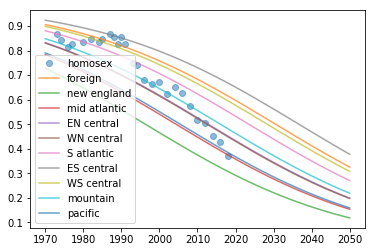

In [33]:
def make_region_df(region_code):
    df = pd.DataFrame()
    df['year'] = np.linspace(1970, 2050)
    df['cohort'] = 1977
    df['sex'] = 1
    df['fund'] = 3
    df['reg16'] = region_code
    df['relig'] = 1
    df['attend'] = 3
    
    return df

plt.plot(disapprove_homosex, 'o', alpha=0.5)

regions = ['foreign',
        'new england',
           'mid atlantic',
           'EN central',
           'WN central',
           'S atlantic',
           'ES central',
           'WS central',
           'mountain',
           'pacific']

for code, region in enumerate(regions):
    df = make_region_df(code)
    pred = results_sex.predict(df)
    plt.plot(df['year'], pred, label=region, alpha=0.7)
    
plt.legend()

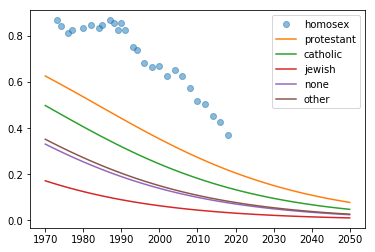

In [34]:
def make_relig_df(relig):
    df = pd.DataFrame()
    df['year'] = np.linspace(1970, 2050)
    df['cohort'] = 1997
    df['sex'] = 1
    df['fund'] = 2
    df['reg16'] = 1
    df['relig'] = relig
    df['attend'] = 3
    
    return df

plt.plot(disapprove_homosex, 'o', alpha=0.5)

religions = ['protestant', 'catholic', 'jewish', 'none', 'other']
for code, relig in enumerate(religions):
    df = make_relig_df(code + 1)
    pred = results_sex.predict(df)
    plt.plot(df['year'], pred, label=relig)
    
plt.legend()

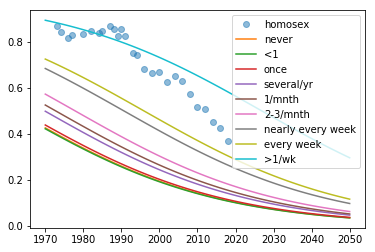

In [35]:
def make_attend_df(attend):
    df = pd.DataFrame()
    df['year'] = np.linspace(1970, 2050)
    df['cohort'] = 1997
    df['sex'] = 1
    df['fund'] = 2
    df['reg16'] = 1
    df['relig'] = 2
    df['attend'] = attend
    
    return df

plt.plot(disapprove_homosex, 'o', alpha=0.5)

attends = ['never', '<1', 'once', 'several/yr', '1/mnth', '2-3/mnth', 'nearly every week', 'every week', '>1/wk']
for code, att in enumerate(attends):
    df = make_attend_df(code)
    pred = results_sex.predict(df)
    plt.plot(df['year'], pred, label=att)
    
plt.legend()

/home/eprice/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


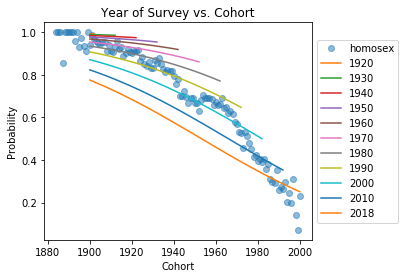

In [79]:
def make_year_df(year):
    df = pd.DataFrame()
    df['cohort'] = np.linspace(1900, year-18)
    df['sex'] = 1
    df['fund'] = 2
    df['reg16'] = 1
    df['relig'] = 2
    df['attend'] = 6
    df['year'] = year
    
    return df

plt.plot(disapprove_homosex_c, 'o', alpha=0.5)


ax = plt.subplot(111)

years = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
for year in years:
    df = make_year_df(year)
    pred = results_sex.predict(df)
#     plt.plot(df['cohort'], pred, label=str(year))
    ax.plot(df['cohort'], pred, label=str(year))
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.xlabel('Cohort')
plt.ylabel('Probability')
plt.title('Year of Survey vs. Cohort')

plt.show()
